
*В этом документе представлено общее описание библиотеки PuzzleLib и документация для модулей Linear и Activation в разделе Modules*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**PuzzleLib**
PuzzleLib - модульная динамическая библиотека для использования в машинном обучении, полностью разработанная в России. Она наследует принципы дизайна Torch и Chainer, а оптимизации различного рода позволяют опережать конкурентов в решении некоторых задач

# **Раздел Modules** 


Нейронные сети всегда имеют четкую структуру, каждую из них можно разделить на независимые блоки. В разделе Modules описаны составляющие нейронных сетей. Из них, как из конструктора, можно собирать готовые модели для решения различных задач.

##**Linear**
Этот модуль выполняет операцию линейного преобразования к входным данным:

$y = xW^T + b$

Переменная|Описание| 
--|--|
$x$ | вектор признаков на входе
$y$ | вектор признаков после преобразования
$W$ | матрица весов слоя
$b$ | вектор смещений слоя

### **Инициализация**

In [ ]:
def __init__(self,  insize,  outsize,  wscale=1.0,  useBias=True,  initscheme=None,  name=None,  empty=False,  transpose=False):

Параметр|Тип|Значение по умолчанию | Описание 
--|--|--|--
insize|int|None|Размер входного вектора
outsize|int|None|Размер выходного вектора
wscale|float|1.0|Дисперсия случайных весов слоя
useBias|bool|True|Использовать ли смещения|
initscheme|Union[tuple,str]|None -> ("xavier_uniform", "in")|Указывает схему инициализации весов слоя
name|str|None|Название слоя
empty|bool|False|Инициализировать ли матрицу весов и смещений
transpose|bool|False|Использование транспонированной матрицы

Здесь должно быть пояснение

### **Примеры**

In [16]:
import numpy as np
from PuzzleLib.Backend import gpuarray 
# (gpuarray необходим для правильного размещения тензора на GPU)
from PuzzleLib.Modules import Linear, Activation

Импортируем библиотеки

In [4]:
batchsize, insize, outsize = 10, 32, 16
data = gpuarray.to_gpu(np.random.randn(batchsize, insize).astype(np.float32))
print(data.shape)

(10, 32)


In [5]:
linear = Linear(insize, outsize)
print(linear.W.shape)

(32, 16)


In [6]:
linear(data)
print(linear.data.shape)

(10, 16)


In [7]:
print(linear(data))

[[-0.3197402   1.2328159   0.46834356  0.7436919  -1.9497484  -0.16786543
  -0.16839103  0.0261829   0.2682909   0.20388171  0.26491734 -0.3437716
  -1.1270636  -0.10029671  0.5139712  -0.31435123]
 [ 0.40998095  0.02731934  0.3786441   0.3880307   0.7077934   0.08800349
  -1.7414784  -0.9395337   1.3186111  -1.3282318  -1.1814835  -1.3582149
  -1.5159658  -0.43157     0.34454903 -2.052954  ]
 [ 0.45942864  0.8885462  -1.0553498   0.94729686 -1.1889195   0.24365008
   0.38722283  1.2884142   0.59392345 -0.05463737 -0.79470533 -2.8912733
  -1.4132223   0.07540387  0.8564      0.28601575]
 [ 0.2721995  -2.295403    1.1211926  -0.911956   -1.2407589   0.07401779
   0.65405947 -0.03374648 -2.2926965   0.8591285   1.0049876  -0.35994595
  -0.39903834 -2.8809867  -0.5148461   1.495196  ]
 [-0.03328639  0.5384829   2.7887826  -0.5898168  -2.3799732  -0.06914496
   0.60737014 -0.894528    0.5379337  -1.2013332  -0.26457077  1.0192693
  -0.19525947 -0.20170009 -0.29170448 -0.42232445]
 [ 0.3905

## **Activation**
Этот модуль реализует операцию активации слоя.

Функция активации — это способ добавить нелинейность в граф нейросети. Это необходимо чтобы улавливать нелинейные зависимости в данных. Нейросеть состоящая только из линейных слоев на это неспособна так как композиция линейных функций линейна

### **Sigmoid (Сигмоид)**
Принимает на вход произвольное вещественное число, а на выходе дает вещественное число в интервале от 0 до 1.

Вычисляется по формуле:

$\sigma(x) = \frac{1}{1+e^{-x}}$

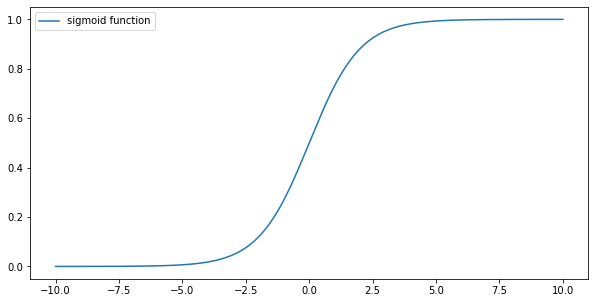

In [35]:
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x) )

act = Activation("sigmoid")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['sigmoid function'])
plt.show()

In [36]:
print(y_puzzlelib)

[4.53978646e-05 4.63158831e-05 4.72524043e-05 4.82078904e-05
 4.91826650e-05 5.01772156e-05 5.11918079e-05 5.22269547e-05
 5.32829872e-05 5.43604510e-05 5.54596263e-05 5.65810624e-05
 5.77251740e-05 5.88924158e-05 6.00832209e-05 6.12981821e-05
 6.25376342e-05 6.38021811e-05 6.50922593e-05 6.64085019e-05
 6.77512726e-05 6.91212408e-05 7.05188504e-05 7.19448217e-05
 7.33995330e-05 7.48836974e-05 7.63978242e-05 7.79426700e-05
 7.95186352e-05 8.11265199e-05 8.27669137e-05 8.44404858e-05
 8.61478256e-05 8.78898063e-05 8.96668862e-05 9.14799530e-05
 9.33296251e-05 9.52167975e-05 9.71420159e-05 9.91062261e-05
 1.01110199e-04 1.03154569e-04 1.05240317e-04 1.07368185e-04
 1.09539207e-04 1.11753972e-04 1.14013594e-04 1.16318828e-04
 1.18670810e-04 1.21070188e-04 1.23518155e-04 1.26015613e-04
 1.28563566e-04 1.31162931e-04 1.33815032e-04 1.36520568e-04
 1.39280892e-04 1.42096920e-04 1.44970079e-04 1.47901112e-04
 1.50891501e-04 1.53942237e-04 1.57054863e-04 1.60230193e-04
 1.63469827e-04 1.667748

**Плюсы**

- бесконечно дифференцируемая гладкая функция

**Минусы**

- насыщение сигмоиды приводит к затуханию градиента: в процессе обратного распространения ошибки локальный градиент, который может быть очень малым, умножается на общий - и в таком случае обнуляет его. Из-за этого сигнал почти не проходит через нейрон к его весам и рекурсивно к его данным;

- выход сигмоиды не центрирован относительно нуля: нейроны в последующих слоях будут получать значения, которые также не центрированы относительно нуля, что оказывает влияние на динамику градиентного спуска.

### **Tanh (Гиперболический тангенс)**
Принимает на вход произвольное вещественное число, а на выходе дает вещественное число в интервале от –1 до 1.

Вычисляется по формуле:

$t h(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

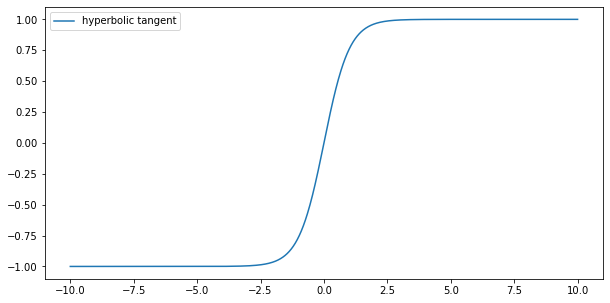

In [24]:
x = np.linspace(-10, 10, 1000)
y = ( 2 / (1 + np.exp(-2*x) ) ) -1

act = Activation("tanh")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['hyperbolic tangent'])
plt.show()

**Плюсы**

- бесконечно дифференцируемая гладкая функция
центрирована относительно нуля

**Минусы**
- дорогая стоимость вычисления


### **ReLU**
Реализует пороговый переход в нуле. Принимает значения на интервале [0, +∞). В данный момент ReLU является одной из самых популярных функций активации, а вокруг нее образовалось множество модификаций.

Вычисляется по формуле:

$f(x)=\max (0, x)$

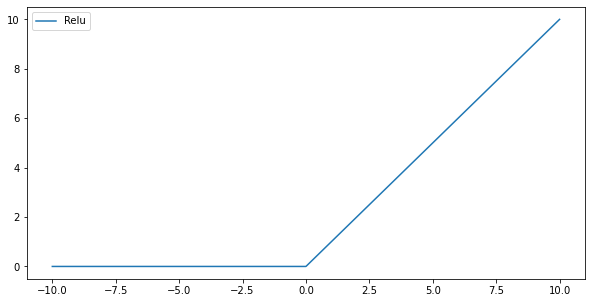

In [38]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

act = Activation("relu")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

In [39]:
print(y_puzzlelib)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

**Плюсы**

- вычислительная простота

- быстрота сходимости стохастического градиента

**Минусы**

- затухающий градиент (устраняется выбором соответствующей скорости обучения)

- не гладкая функция

### **LeakyReLU**
Модификация ReLU с добавлением малой константы α, при этом получаем, что при отрицательных значениях аргумента значение функции находится достаточно близко к нулю, но не равно ему. Принимает значения на интервале (-∞, +∞).

Вычисляется по формуле:

$f(x)=\left\{\begin{aligned} \alpha x, & \text { если } x<0 \\ x, & \text { если } x \geq 0 \end{aligned}\right.$

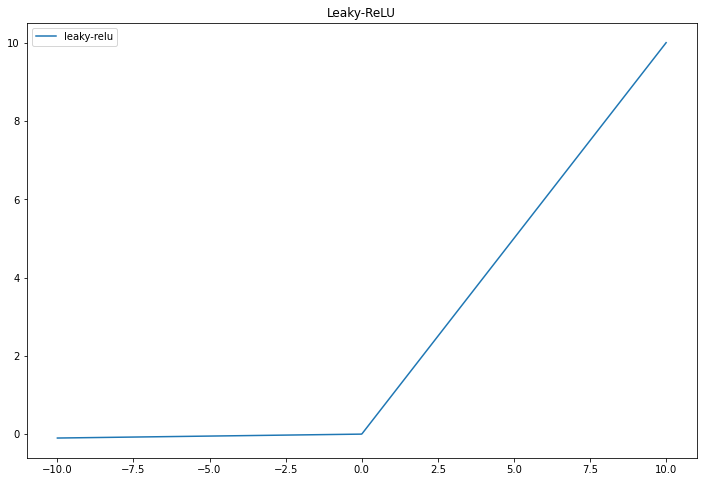

In [40]:
def leaky_relu(x):
    return max(0.01*x, x)

act = Activation("leakyRelu")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))

plt.figure(figsize=(12,8))
plt.plot(x, list(map(leaky_relu, x)), label="leaky-relu")
plt.title("Leaky-ReLU")
plt.legend()
plt.show()

In [45]:
print(y_puzzlelib)

[-9.99999940e-02 -9.97997895e-02 -9.95995998e-02 -9.93993953e-02
 -9.91991982e-02 -9.89989936e-02 -9.87987965e-02 -9.85985920e-02
 -9.83983949e-02 -9.81981903e-02 -9.79980007e-02 -9.77977887e-02
 -9.75975990e-02 -9.73973945e-02 -9.71971974e-02 -9.69969928e-02
 -9.67967957e-02 -9.65965912e-02 -9.63963941e-02 -9.61961895e-02
 -9.59959999e-02 -9.57957879e-02 -9.55955982e-02 -9.53953937e-02
 -9.51951966e-02 -9.49949920e-02 -9.47947949e-02 -9.45945904e-02
 -9.43943933e-02 -9.41941887e-02 -9.39939991e-02 -9.37937871e-02
 -9.35935974e-02 -9.33933929e-02 -9.31931958e-02 -9.29929912e-02
 -9.27927941e-02 -9.25925896e-02 -9.23923925e-02 -9.21921879e-02
 -9.19919834e-02 -9.17917863e-02 -9.15915817e-02 -9.13913921e-02
 -9.11911875e-02 -9.09909904e-02 -9.07907858e-02 -9.05905887e-02
 -9.03903842e-02 -9.01901871e-02 -8.99899825e-02 -8.97897854e-02
 -8.95895809e-02 -8.93893912e-02 -8.91891867e-02 -8.89889896e-02
 -8.87887850e-02 -8.85885879e-02 -8.83883834e-02 -8.81881863e-02
 -8.79879817e-02 -8.77877

**Плюсы**

- вычислительная простота

- быстрота сходимости стохастического градиента

**Минусы**

- затухающий градиент

- не гладкая функция

### **ELU**
Гладкая модификация ReLU и LeakyReLU. Принимает значения на интервале [-α, +∞).

Вычисляется по формуле:

$f(x)=\left\{\begin{array}{cc}\alpha\left(e^{x}-1\right), & \text { если } x<0 \\ x, & \text { если } x \geq 0\end{array}\right.$

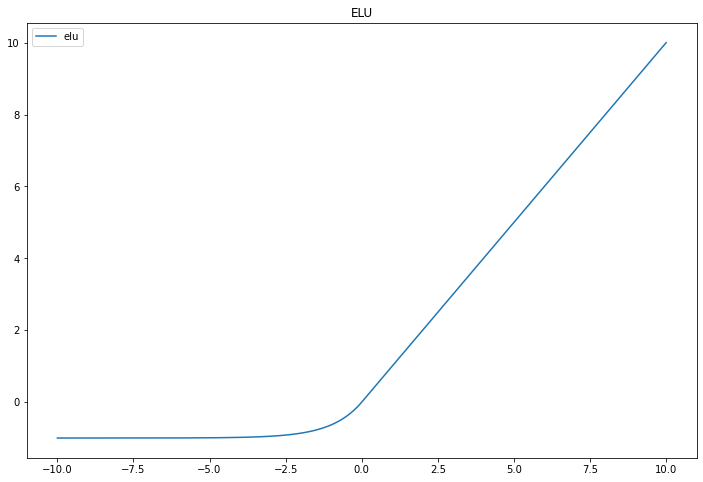

In [46]:
def elu(x):
    if x > 0:
        return x
    else: 
        return np.exp(x) - 1
    
    
act = Activation("elu")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))
    

plt.figure(figsize=(12,8))
plt.plot(x, list(map(elu, x)), label="elu")
plt.title("ELU")
plt.legend()
plt.show()

In [47]:
print(y_puzzlelib)

[-9.9995458e-01 -9.9995369e-01 -9.9995273e-01 -9.9995178e-01
 -9.9995083e-01 -9.9994981e-01 -9.9994880e-01 -9.9994779e-01
 -9.9994671e-01 -9.9994564e-01 -9.9994451e-01 -9.9994344e-01
 -9.9994224e-01 -9.9994111e-01 -9.9993992e-01 -9.9993873e-01
 -9.9993747e-01 -9.9993622e-01 -9.9993491e-01 -9.9993360e-01
 -9.9993223e-01 -9.9993086e-01 -9.9992949e-01 -9.9992806e-01
 -9.9992657e-01 -9.9992514e-01 -9.9992359e-01 -9.9992204e-01
 -9.9992049e-01 -9.9991888e-01 -9.9991721e-01 -9.9991554e-01
 -9.9991387e-01 -9.9991208e-01 -9.9991035e-01 -9.9990851e-01
 -9.9990666e-01 -9.9990475e-01 -9.9990284e-01 -9.9990088e-01
 -9.9989885e-01 -9.9989682e-01 -9.9989474e-01 -9.9989259e-01
 -9.9989045e-01 -9.9988824e-01 -9.9988598e-01 -9.9988365e-01
 -9.9988133e-01 -9.9987894e-01 -9.9987644e-01 -9.9987400e-01
 -9.9987143e-01 -9.9986881e-01 -9.9986619e-01 -9.9986345e-01
 -9.9986070e-01 -9.9985790e-01 -9.9985498e-01 -9.9985206e-01
 -9.9984908e-01 -9.9984604e-01 -9.9984294e-01 -9.9983972e-01
 -9.9983650e-01 -9.99833

**Плюсы**

- вычислительная простота
- быстрота сходимости стохастического градиента
- гладкая функция

**Минусы**

- затухающий градиент

### **SoftPlus**
Гладкая функция активации. Принимает значения на интервале [0, +∞).

Вычисляется по формуле:

$f(x)=\ln \left(1+e^{x}\right)$

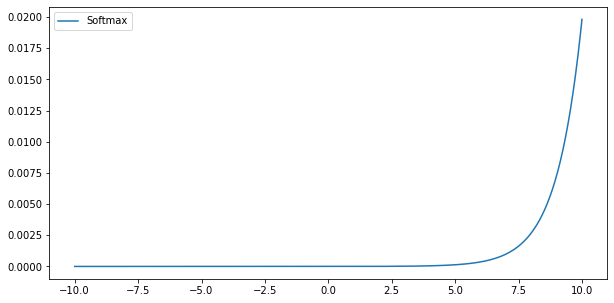

In [48]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

act = Activation("softPlus")
y_puzzlelib = act(gpuarray.to_gpu(x.astype(np.float32)))

plt.figure(figsize=(10, 5))
plt.plot(x, softmax(x))
plt.legend(['Softmax'])
plt.show()

In [49]:
print(y_puzzlelib)

[4.54910041e-05 4.64446348e-05 4.72790598e-05 4.82326905e-05
 4.93055231e-05 5.02591502e-05 5.12127808e-05 5.22856135e-05
 5.33584462e-05 5.44312788e-05 5.55041115e-05 5.66961498e-05
 5.77689825e-05 5.89610172e-05 6.01530555e-05 6.13450902e-05
 6.26563342e-05 6.38483689e-05 6.51596129e-05 6.64708496e-05
 6.77820935e-05 6.92125323e-05 7.06429782e-05 7.20734242e-05
 7.35038630e-05 7.49343089e-05 7.64839569e-05 7.80336050e-05
 7.95832530e-05 8.12521030e-05 8.28017510e-05 8.44706010e-05
 8.62586603e-05 8.79275103e-05 8.97155624e-05 9.15036217e-05
 9.34108757e-05 9.53181370e-05 9.72253983e-05 9.91326524e-05
 1.01159116e-04 1.03185579e-04 1.05331244e-04 1.07476910e-04
 1.09622575e-04 1.11887442e-04 1.14152317e-04 1.16417184e-04
 1.18801261e-04 1.21185330e-04 1.23562073e-04 1.26065352e-04
 1.28687825e-04 1.31191104e-04 1.33932786e-04 1.36555274e-04
 1.39416152e-04 1.42157849e-04 1.45018726e-04 1.47998828e-04
 1.50978914e-04 1.54074543e-04 1.57173839e-04 1.60273135e-04
 1.63610835e-04 1.668293

**Плюсы**

- гладкая бесконечно дифференцируемая функция

**Минусы**
- не центрирована относительно нуля


### **Инцициализация**

In [ ]:
def __init__(self, activation, slc=None, inplace=False, name=None, args=()):

Параметр|Тип|Значение по умолчанию | Описание 
--|--|--|--
activation|str|None|Вид активации
slc|slice|None|	Срез, по которому будет вычислена функция активации
inplace|bool|False|Если True, то выходной тензор будет записан в памяти на место входного
name|str|None|Название


**activation** - определяет выбранную функцию активации

**inplace** - флаг, показывающий, нужно ли выделять дополнительные ресурсы памяти для результата. Если True, то выходной тензор будет записан в памяти на место входного, что может негативно отразиться на работе сети, если входной тензор должен принимать участие в расчётах на других ветках графа.

### **Примеры**

Сформируем наглядные данные

In [14]:
np.random.seed(123)
h, w = 3, 3
data = gpuarray.to_gpu(np.random.randint(-10, 10, (h, w)).astype(np.float32))
print(data)

[[  3.  -8.  -8.]
 [ -4.   7.   9.]
 [  0.  -9. -10.]]


Допустим, нам интересен сигмоид в качестве функции активации. Инициализируем объект и отправим в него данные.

In [17]:
act = Activation('sigmoid')
print(act(data))

[[9.5257413e-01 3.3535017e-04 3.3535017e-04]
 [1.7986210e-02 9.9908900e-01 9.9987662e-01]
 [5.0000000e-01 1.2339462e-04 4.5397865e-05]]
